# Análise sobre as corridas de táxi em Chicago - Empresa Zuber

# Conteúdo <a id='back'></a>

* [1) Objetivo do Projeto](#projectgoal)
* [2) Preparação de Dados](#data_preprocessing)
* [3) Testando Hipóteses](#testinghypotheses)
* [4) Conclusões Gerais](#end)

# Objetivo do projeto

Zuber é uma nova empresa de compartilhamento de caronas que está sendo lançada em Chicago. O objetivo desse projeto é encontrar padrões nas informações disponíveis. Entendendo as preferências dos passageiros e o impacto de fatores externos nas corridas.

Será analisado os dados de concorrentes e testará uma hipótese sobre o impacto do clima na frequência das viagens.

# Preparação de dados

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from math import factorial
from scipy import stats # Carregando todas as bibliotecas

In [2]:
sql01_df = pd.read_csv('/datasets/project_sql_result_01.csv', sep = ',', decimal='.') # Carregando o arquivo de dados em DataFrame

In [3]:
sql04_df = pd.read_csv('/datasets/project_sql_result_04.csv', sep = ',', decimal='.') # Carregando o arquivo de dados em DataFrame

In [4]:
sql01_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
sql01_df.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [6]:
print(sql01_df.isna().sum()) #calculando o número de valores ausentes

company_name    0
trips_amount    0
dtype: int64


In [7]:
print(sql01_df.duplicated().sum()) #Contando duplicados explícitos

0


Não foram encontrados dados duplicados ou ausentes em sql01_df, e os tipos de dados estão de acordo. Não há necessidade de converter nenhum dado. 


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho checando a consistência dos dados.

Sempre importante para garantir uma análise robusta!
</div>


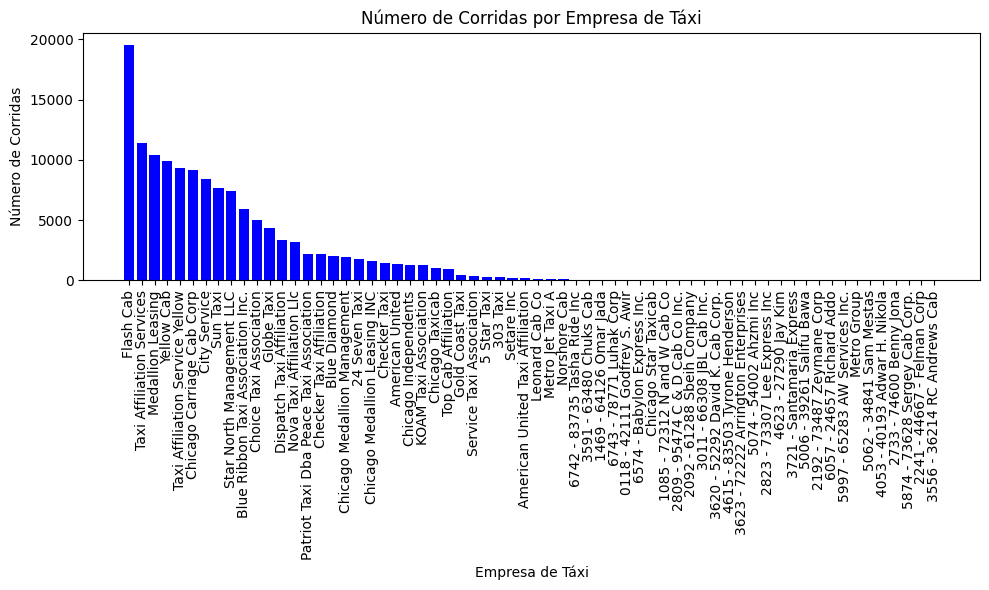

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(sql01_df['company_name'], sql01_df['trips_amount'], color='blue')
plt.xlabel('Empresa de Táxi')
plt.ylabel('Número de Corridas')
plt.title('Número de Corridas por Empresa de Táxi')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

No gráfico acima, a relação de número de corridas por empresa de táxi nos mostra que a Flash Cab é líder disparada na cidade de Chicago, tendo um pouco menos que o dobro da segunda colocada neste ranking, a empresa Taxi Affiliation Services, com aproximadamente 11000 corridas. As empresas à seguir, vão descendo progressivamente suas corridas em relação a empresa acima.

In [9]:
sql04_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [10]:
print(sql04_df.isna().sum()) #calculando o número de valores ausentes

dropoff_location_name    0
average_trips            0
dtype: int64


In [11]:
print(sql04_df.duplicated().sum()) #Contando duplicados explícitos

0


Não foram encontrados dados duplicados ou ausentes em sql04_df, e os tipos de dados estão de acordo. Não há necessidade de converter nenhum dado. 

In [12]:
top10_location = sql04_df.head(10)
print(top10_location)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


Acima estão, os 10 principais bairros em termos de destinos.

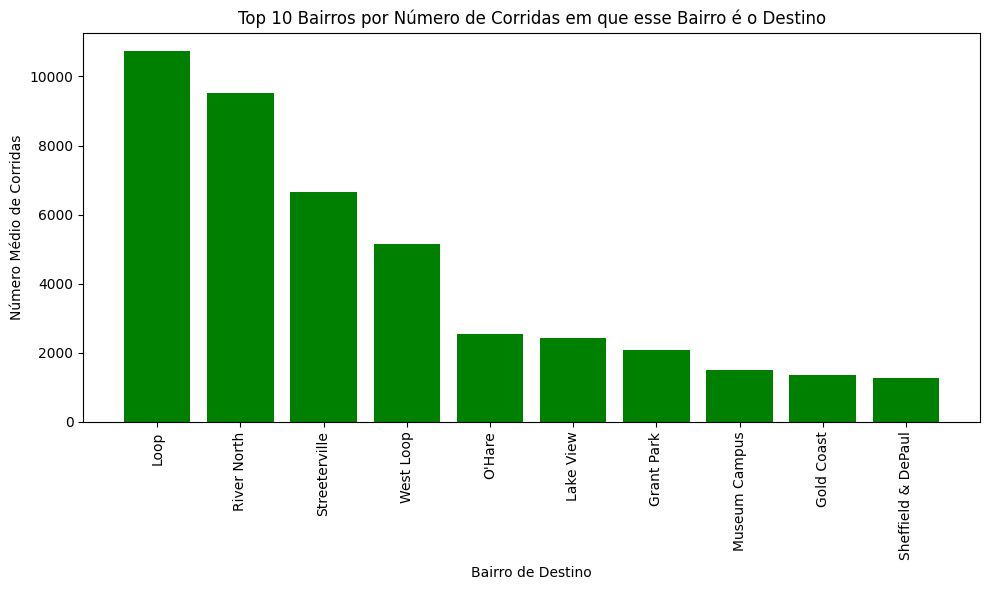

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(top10_location['dropoff_location_name'], top10_location['average_trips'], color='green')
plt.xlabel('Bairro de Destino')
plt.ylabel('Número Médio de Corridas')
plt.title('Top 10 Bairros por Número de Corridas em que esse Bairro é o Destino')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Através do gráfico acima, sobre DESTINO x NÚMERO MÉDIO DE CORRIDAS, o bairro "Loop" alcança acima 10000 corridas. Os bairros "O'Hare", "Lake View" e "Grant Park" possuem números próximos, assim como os bairros "Museum Campus", "Gold Coast" e "Sheffield & DePaul" com números mais baixos nesse top 10. 

In [14]:
sql07_df = pd.read_csv('/datasets/project_sql_result_07.csv', sep = ',', decimal='.') # Carregando o arquivo de dados em DataFrame

In [15]:
sql07_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [16]:
print(sql04_df.isna().sum()) 

dropoff_location_name    0
average_trips            0
dtype: int64


Em sql07_df, os tipos de dados estão de acordo, não havendo necessidade de converter nenhum dado.

In [17]:
sql07_df.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


# Testando Hipóteses

Para realizar a análise de significância estatística, precisamos definir um valor de limiar alfa. O valor alfa (
𝛼) é a probabilidade de rejeitar a hipótese nula (de que não há diferença) quando ela é verdadeira. Um valor comumente usado para alfa é 0.05 (5%), o que significa que aceitamos uma probabilidade de 5% de cometer um erro tipo I (falso positivo).

Aqui, vamos testar a seguinte hipótese: "A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos."

In [40]:

sql07_df['start_ts'] = pd.to_datetime(sql07_df['start_ts'])# Convertendo a coluna 'date' para datetime
saturday_data = sql07_df['start_ts'].dt.dayofweek == 5


saturday_data = sql07_df['weather_conditions'].apply(lambda x: 'Bad' if 'rain' in x.lower() or 'storm' in x.lower() else 'Good') # Identficando dias chuvosos

bad_weather_sat = sql07_df[sql07_df['weather_conditions']  == 'Bad']['duration_seconds'] # Separando os dados em sábados chuvosos e não chuvosos
good_weather_sat = sql07_df[sql07_df['weather_conditions'] == 'Good']['duration_seconds']
                                                                         
mean_rainy = sql07_df[sql07_df['weather_conditions'] == 'Bad']['duration_seconds'].mean()
mean_non_rainy = sql07_df[sql07_df['weather_conditions'] == 'Good']['duration_seconds'].mean() # Calculando a média de duração para sábados chuvosos e não chuvosos

print(f"A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare, em sábados chuvosos: {mean_rainy}")
print(f"A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare, em sábados não chuvosos: {mean_non_rainy}")
                                                                         
    
# Definir a hipótese nula e alternativa
# Hipótese nula: A média da duração dos passeios do Loop para o Aeroporto Internacional O'Hare não muda nos sábados chuvosos.
# Hipótese alternativa: A média da duração dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos.


results = stats.ttest_ind(sql07_df['duration_seconds'], sql07_df['duration_seconds'], equal_var=False) #Realizando o teste t

alpha = 0.05


print('valor-p: ', results.pvalue) # imprimindo o valor-p resultante

if (results.pvalue < alpha):
    print('Rejeitamos a hipótese nula.')
else:
    print('Não podemos rejeitar a hipótese nula.')
 #Verificando se a diferença é estatisticamente significativa

A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare, em sábados chuvosos: 2427.2055555555557
A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare, em sábados não chuvosos: 1999.6756756756756
valor-p:  1.0
Não podemos rejeitar a hipótese nula.


Apesar da diferença observada nas classificações médias, onde a duração média dos passeios em sábados chuvosos e não chuvosos, a análise estatística sugere que essa diferença não é estatisticamente significativa ao nível de 0.05. Isso significa que, com base nos dados disponíveis, não podemos afirmar com confiança que a chuva é um fator importante na duração das viagens pra o Aeroporto Internacional O'Hare.

Sendo assim, o resultado dos testes foram que a diferença nas classificações médias não são estatisticamente significativa, portanto não rejeitamos a hipótese nula.

# Conclusão Geral



Este projeto forneceu uma compreensão inicial dos padrões de corridas de táxi em Chicago e serviu como um ponto de partida para a Zuber desenvolver suas estratégias de mercado e operações.

A Flash Cab é a líder destacada no mercado de táxis em Chicago, indicando uma forte preferência dos passageiros por essa empresa. O bairro "Loop" é o destino mais frequente, sugerindo que é uma área de alto tráfego e potencialmente um ponto estratégico para serviços para a Zuber.

A análise da duração das corridas nos sábados chuvosos versus não chuvosos mostrou que, apesar de uma aparente diferença nas médias, essa diferença não é estatisticamente significativa. Isso sugere que a chuva pode não ser um fator crucial na duração das viagens para o Aeroporto Internacional O'Hare.

A Zuber deve considerar estratégias para competir com a Flash Cab, possivelmente oferecendo promoções ou melhorando o serviço na área central de Chicago (Loop), onde a demanda é alta. É importante focar em áreas de alto tráfego para maximizar a utilização dos veículos, e monitorar outros fatores externos, como eventos especiais e condições de tráfego, que podem impactar o serviço.
